In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import os

In [15]:
FORESIGHT_DIRECTORY = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PROCESSED_DIRECTORY = os.path.join(FORESIGHT_DIRECTORY, "data", "processed")

# Nombre de los archivos
TRAIN_FILENAME = "X_train.csv"
TEST_FILENAME = "X_test.csv"

# Rutas completas
TRAIN_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TRAIN_FILENAME)
TEST_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TEST_FILENAME)

In [16]:
X_test = pd.read_csv(TEST_PATH)
X_train = pd.read_csv(TRAIN_PATH)

In [17]:
# Definir función de mapeo
def map_difficulty(val):
    if val == 0:
        return 0
    elif val in [1, 2]:
        return 1
    elif val in [3, 4, 5, 6]:
        return 2
    elif val in [7, 8]:
        return 3
    elif val == 9:
        return 4

# Aplicar la función
X_train["difficulty"] = X_train["difficulty"].apply(map_difficulty)
X_test["difficulty"] = X_test["difficulty"].apply(map_difficulty)

In [18]:
y_train = X_train['difficulty']
X_train = X_train.drop('difficulty', axis=1)
y_test = X_test['difficulty']
X_test = X_test.drop('difficulty', axis=1)

In [19]:


# Entrena PCA (sin reducir aún)
pca = PCA()
pca.fit(X_train)  # X_train debe estar escalado si aún no lo está


PCA()

In [20]:


# DataFrame con cargas de cada variable en cada componente
loadings = pd.DataFrame(
    np.abs(pca.components_),  # valor absoluto para importancia
    columns=X_train.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)


In [21]:
# Top 10 columnas que más contribuyen al primer componente
top_pc1 = loadings.loc["PC1"].sort_values(ascending=False).head(10)
print("Top columnas en PC1:")
print(top_pc1)


Top columnas en PC1:
monster4_hp_max    0.597412
monster5_hp_max    0.585093
monster6_hp_max    0.462369
monster7_hp_max    0.253043
monster5_ac        0.072587
monster4_ac        0.069006
monster6_ac        0.059284
monster4_cr        0.038296
monster5_cr        0.037889
monster7_ac        0.033258
Name: PC1, dtype: float64


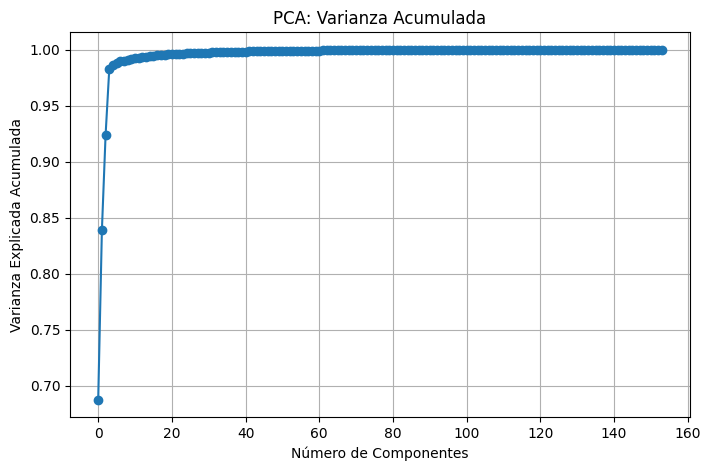

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA: Varianza Acumulada')
plt.grid(True)
plt.show()


In [23]:
# Reducimos a, por ejemplo, 30 componentes
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar KNN con menos dimensiones y datos
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.46      0.44      0.45      2561
           1       0.67      0.77      0.72     12506
           2       0.33      0.21      0.26      3669
           3       0.13      0.04      0.06      1095
           4       0.94      0.95      0.94     40169

    accuracy                           0.83     60000
   macro avg       0.51      0.48      0.49     60000
weighted avg       0.81      0.83      0.82     60000



In [24]:
from sklearn.metrics import confusion_matrix

# Supongamos que ya hiciste predicciones
# y_test: etiquetas verdaderas
# y_pred: etiquetas predichas por tu modelo

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1132  1291    34     8    96]
 [ 1056  9584   747    72  1047]
 [  124  1726   784    74   961]
 [   39   366   199    42   449]
 [   95  1251   636   131 38056]]


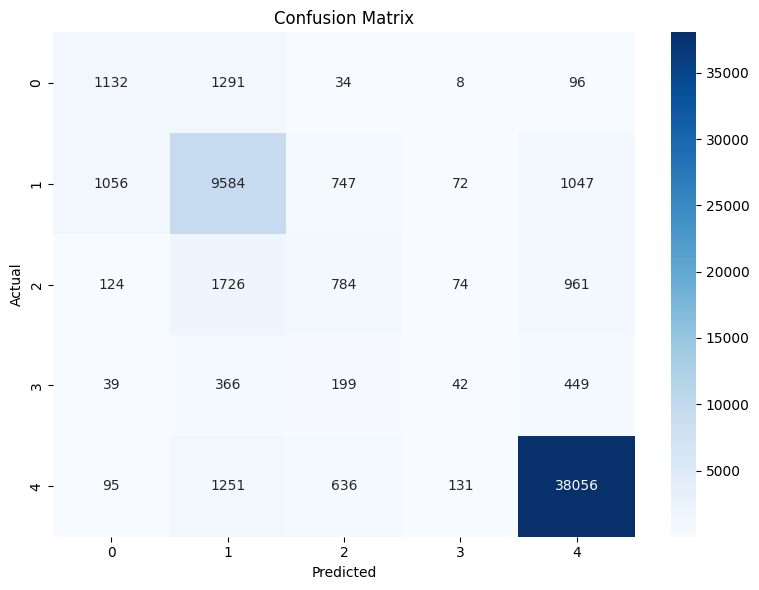

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

<Axes: >

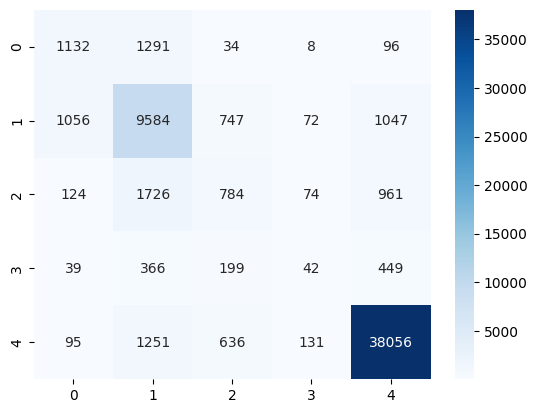

In [26]:
class_names = sorted(set(y_test))  # o usa tu lista de clases explícita
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)